## colab 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 소스 파일 경로
source_file_path = '/content/drive/MyDrive/Colab Notebooks/archive.zip'

# 대상 파일 경로
target_file_path = '/content/archive.zip'

# 파일 복사
shutil.copyfile(source_file_path, target_file_path)

# ZIP 파일 경로
zip_file_path = '/content/archive.zip'

# 언집할 폴더 경로
target_folder_path = '/content/dataset'

# ZIP 파일 언집
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_folder_path)

In [2]:
%pip install tensorflow 

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5a/f2/5c2f878c62c8b79c629b11b33516bb55054d7677eba6f56f3a20296b56bd/tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/0d/7a/e55589e4093cca1934db5e99644c1c2424a9b3aac104b7f6176605a5eeb7/h5py-3.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for keras<2.14,>=2.13.1 from https://files.pythonhosted.org/packages/2e/f3/19da7511b45

In [4]:
def csv_to_df(split_type, bearing):
    colname = ['Hour' , 'Minute' , 'Second', 'microsecond', 'Horiz', 'Vert']

    # CSV 파일들이 있는 디렉토리 경로
    directory_path = f'/content/dataset/ieee-phm-2012-data-challenge-dataset-master/{split_type}/{bearing}'

    # 디렉토리 내의 모든 CSV 파일 경로를 가져오기
    file_paths = glob.glob(directory_path + '/*.csv')

    # 파일 경로를 순서대로 정렬
    file_paths = sorted(file_paths)

    # 파일들을 담을 빈 DataFrame 생성
    combined_data = pd.DataFrame()

    # acc 파일만 불러오기 (파일명에 'acc'가 포함된 파일들)
    acc_file_paths = [file_path for file_path in file_paths if 'acc' in file_path]

    # 각 파일을 순회하며 데이터를 불러온 뒤 빈 DataFrame에 추가
    for file_path in acc_file_paths:
        df = pd.read_csv(file_path, names=colname, header=None)  # 첫 번째 행을 인덱스로 사용하지 않음
        combined_data = pd.concat([combined_data, df], ignore_index=True, axis=0)

    return combined_data

## import

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import shutil
import zipfile
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates
from datetime import datetime, time
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense
# from keras.callbacks import EarlyStopping

In [2]:
%cd /home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project/
## local setting 
def csv_to_df(split_type, bearing):
    
    colname = ['Hour' , 'Minute' , 'Second', 'microsecond', 'Horiz', 'Vert']
    # CSV 파일들이 있는 디렉토리 경로
    directory_path = f'../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/{split_type}/{bearing}/'

    # 디렉토리 내의 모든 CSV 파일 경로를 가져오기
    file_paths = glob.glob(directory_path + '/*.csv')

    # 파일 경로를 순서대로 정렬
    file_paths = sorted(file_paths)

    # 파일들을 담을 빈 DataFrame 생성
    combined_data = pd.DataFrame()

    # acc 파일만 불러오기 (파일명에 'acc'가 포함된 파일들)
    acc_file_paths = [file_path for file_path in file_paths if 'acc' in file_path]

    ## csv learning data 속도 개선 
    # Read all CSV files and combine them into a single DataFrame
    return pd.concat((pd.read_csv(file_path,names=colname, index_col=None, header=None) for file_path in acc_file_paths), ignore_index=True)




/home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project


In [ ]:
acc_file_paths

In [3]:
def convert_timestamp(df):

    # Convert timestamp columns to integers and create a new DataFrame with these values
    timestamp_integers = df[['Hour' , 'Minute' , 'Second', 'microsecond']].astype(int)
    timestamp_integers.columns = ['hour', 'minute', 'second', 'microsecond']

    # Combine the integer values to form a string in the format 'HH:MM:SS.microseconds'
    df['timestamp'] = timestamp_integers.apply(lambda x: f"{x['hour']:02d}:{x['minute']:02d}:{x['second']:02d}.{x['microsecond']:06d}", axis=1)

    # Convert the 'timestamp' column to a Pandas datetime object
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S.%f')

    # Remove the date part from the 'timestamp' column
    df['timestamp'] = df['timestamp'].dt.time

    df = df.drop(['Hour' , 'Minute' , 'Second', 'microsecond'], axis=1)

    return df

In [4]:
def make_dataframe(split_type, bearing):
    df = csv_to_df(split_type, bearing)
    df = convert_timestamp(df)
    return df

In [5]:
Learning_Bearing1_1 = make_dataframe('Learning_set', 'Bearing1_1')
#Learning_Bearing1_2 = make_dataframe('Learning_set', 'Bearing1_2')
#Learning_Bearing2_1 = make_dataframe('Learning_set', 'Bearing2_1')
#Learning_Bearing2_2 = make_dataframe('Learning_set', 'Bearing2_2')
#Learning_Bearing3_1 = make_dataframe('Learning_set', 'Bearing3_1')
#Learning_Bearing3_2 = make_dataframe('Learning_set', 'Bearing3_2')

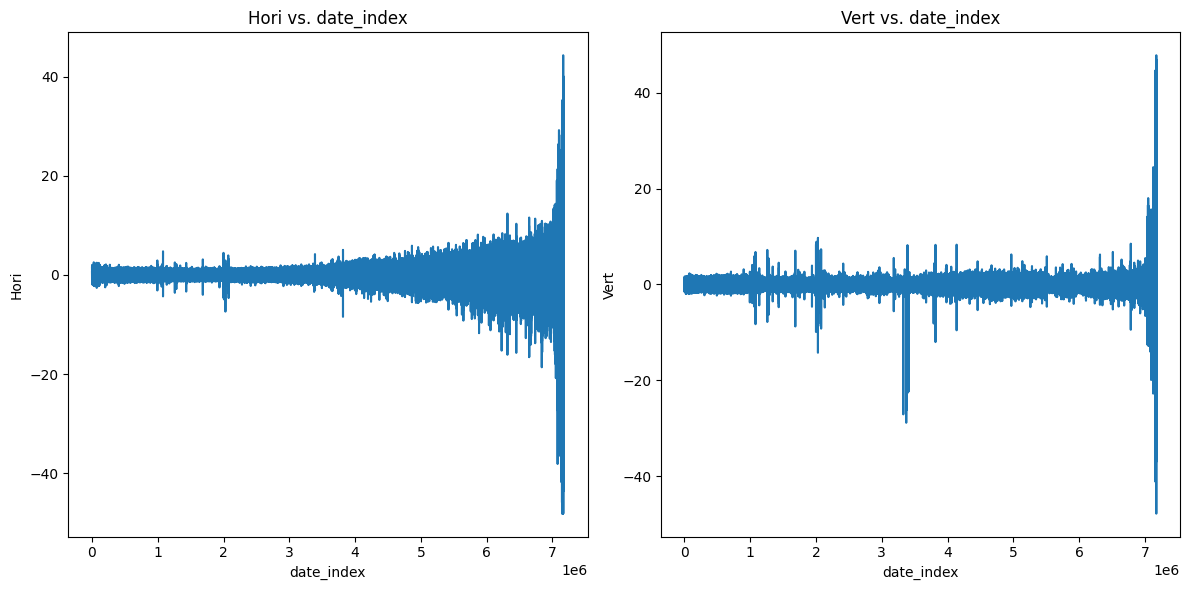

In [7]:
# Learning_Bearing1_1 데이터프레임에서 수평가속도와 수직가속도 추출
horiz_acceleration = Learning_Bearing1_1['Horiz']
vert_acceleration = Learning_Bearing1_1['Vert']

# 그래프 그리기
plt.figure(figsize=(12, 6))  # 그림의 크기 설정

# 수평가속도 그래프 그리기
plt.subplot(1, 2, 1)  # 수평가속도 그래프를 위한 서브플롯 생성
plt.plot(horiz_acceleration)
plt.xlabel('date_index')
plt.ylabel('Hori')
plt.title('Hori vs. date_index')

# 수직가속도 그래프 그리기
plt.subplot(1, 2, 2)  # 수직가속도 그래프를 위한 서브플롯 생성
plt.plot(vert_acceleration)
plt.xlabel('date_index')
plt.ylabel('Vert')
plt.title('Vert vs. date_index')

plt.tight_layout()  # 서브플롯 간의 겹침을 방지하기 위해
plt.show()

In [8]:
# 오토인코더에 입력으로 사용할 수평가속도와 수직가속도 데이터 추출
horiz_acceleration = Learning_Bearing1_1['Horiz'].values
vert_acceleration = Learning_Bearing1_1['Vert'].values

# 데이터 스케일링
scaler = MinMaxScaler()
horiz_acceleration = scaler.fit_transform(horiz_acceleration.reshape(-1, 1))
vert_acceleration = scaler.fit_transform(vert_acceleration.reshape(-1, 1))

# 2차원 배열로 변환
horiz_acceleration = horiz_acceleration.reshape(-1, 1)
vert_acceleration = vert_acceleration.reshape(-1, 1)

In [57]:


# 오토인코더 모델 구성
input_dim = 2  # 입력 차원 (수평가속도와 수직가속도 두 개의 차원)
input_data = Input(shape=(input_dim,))
encoder = Dense(256, activation='relu')(input_data)
encoder = Dense(128, activation='relu')(encoder)
encoder = Dense(64, activation='relu')(encoder)
encoder = Dense(32, activation='relu')(encoder)

embedding = Dense(8, activation='relu')(encoder)

decoder = Dense(32, activation='relu')(embedding)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(128, activation='relu')(decoder)
decoder_output = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_data, outputs=decoder_output)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')



In [58]:
# Early Stopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# 오토인코더 모델 훈련
autoencoder.fit(np.hstack([horiz_acceleration, vert_acceleration]),
                np.hstack([horiz_acceleration, vert_acceleration]),
                epochs=5, batch_size=32, verbose=1,
                validation_split=0.2, callbacks=[early_stopping])

Epoch 1/5
179392/179392 [==============================] - 192s 1ms/step - loss: 0.2609 - val_loss: 0.2608
Epoch 2/5
179392/179392 [==============================] - 192s 1ms/step - loss: 0.2609 - val_loss: 0.2608
Epoch 3/5
179392/179392 [==============================] - 195s 1ms/step - loss: 0.2609 - val_loss: 0.2608
Epoch 4/5
179392/179392 [==============================] - 189s 1ms/step - loss: 0.2609 - val_loss: 0.2608
Epoch 5/5
179392/179392 [==============================] - 185s 1ms/step - loss: 0.2609 - val_loss: 0.2608


In [67]:
import tensorflow as tf
autoencoder2 = tf.keras.models.load_model('../Team-project/output/AutoEncoder/autoencoder_model.h5')

In [84]:
# 오토인코더 모델을 사용하여 데이터 재생성
reconstructed_data_retry = autoencoder2.predict(np.hstack([horiz_acceleration, vert_acceleration]))



224240/224240 [==============================] - 120s 530us/step


In [65]:
autoencoder.save('../Team-project/output/AutoEncoder/autotest1.h5')

/home/i4624/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## pytorch version 

In [10]:
Learning_Bearing1_1

,Horiz,Vert,timestamp
0,0.552,-0.146,09:39:39.065664
1,0.501,-0.480,09:39:39.065703
2,0.138,0.435,09:39:39.065742
3,-0.423,0.240,09:39:39.065781
4,-0.802,0.020,09:39:39.065820
...,...,...,...
7175675,-3.353,2.129,17:26:39.165470
7175676,-2.868,-2.299,17:26:39.165510
7175677,-5.507,-1.844,17:26:39.165550
7175678,-3.578,2.146,17:26:39.165580


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

# Input dimension (two dimensions for horizontal and vertical acceleration)
input_dim = 2

# Define the autoencoder model
class Autoencoder_PyTorch(nn.Module):
    def __init__(self):
        super(Autoencoder_PyTorch, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )

        # Embedding
        self.embedding = nn.Linear(32, 4)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(1024, 2)
        x = self.embedding(x)
        x = self.decoder(x)
        return x


In [21]:
# Create the autoencoder model
autoencoder_pytorch = Autoencoder_PyTorch()

# Define the optimizer
optimizer = optim.SGD(autoencoder_pytorch.parameters(), lr=0.01)

# Loss function
criterion = nn.MSELoss()

# Data processing
horiz_acceleration_pytorch = np.array(horiz_acceleration)
vert_acceleration_pytorch = np.array(vert_acceleration)
horiz_acceleration_pytorch = torch.from_numpy(horiz_acceleration_pytorch).float()
vert_acceleration_pytorch = torch.from_numpy(vert_acceleration_pytorch).float()


In [27]:
horiz_acceleration_pytorch

tensor([[0.5268],
        [0.5263],
        [0.5223],
        ...,
        [0.4613],
        [0.4821],
        [0.4915]])

In [28]:
vert_acceleration_pytorch

tensor([[0.4984],
        [0.4950],
        [0.5045],
        ...,
        [0.4807],
        [0.5224],
        [0.5049]])

In [22]:
import torch
from torch.utils.data import DataLoader

# Create the dataset
dataset = horiz_acceleration_pytorch + vert_acceleration_pytorch

# Create the data loader
data_loader = DataLoader(dataset, batch_size=1024)

# Train the model
for epoch in range(5):
    for data in data_loader:
        # Forward pass
        output = autoencoder_pytorch(data)

        # Calculate the loss
        loss = criterion(output, data)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print the progress
        print(f'Epoch {epoch + 1} loss: {loss.item()}')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1024x1 and 2x128)

In [ ]:
# Save the model
torch.save(autoencoder_pytorch.state_dict(), 'autoencoder.pt')

# Load the model
autoencoder_pytorch = Autoencoder_PyTorch()
autoencoder_pytorch.load_state_dict(torch.load('autoencoder.pt'))



In [ ]:
# Predict the data
reconstructed_data_retry = autoencoder_pytorch(np.hstack([horiz_acceleration_pytorch, vert_acceleration_pytorch]))

## visual

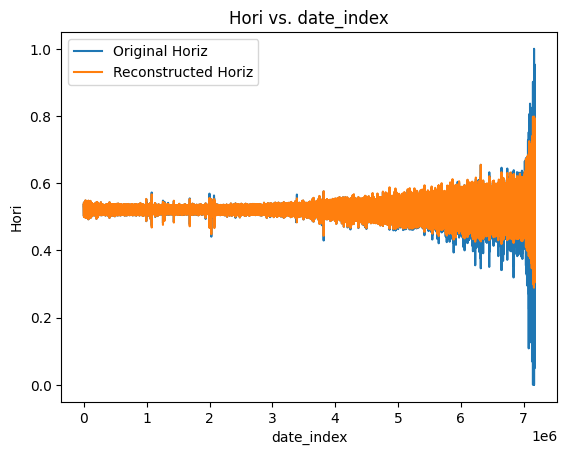

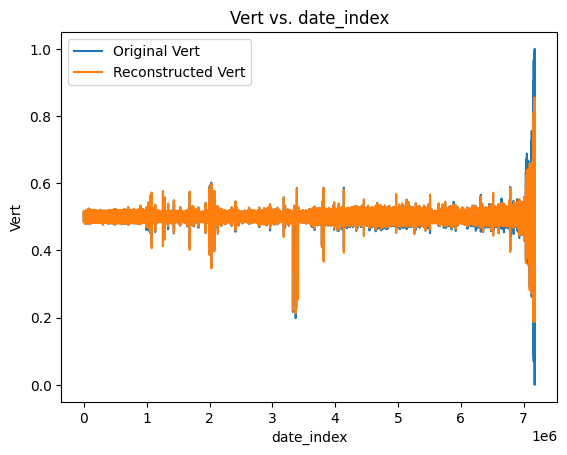

In [69]:
# 수평가속도 데이터 시각화
plt.plot(horiz_acceleration, label='Original Horiz')
plt.plot(reconstructed_data[:, 0], label='Reconstructed Horiz')
plt.xlabel('date_index')
plt.ylabel('Hori')
plt.title('Hori vs. date_index')
plt.legend()
plt.show()

# 수직가속도 데이터 시각화
plt.plot(vert_acceleration, label='Original Vert')
plt.plot(reconstructed_data[:, 1], label='Reconstructed Vert')
plt.xlabel('date_index')
plt.ylabel('Vert')
plt.title('Vert vs. date_index')
plt.legend()
plt.show()

In [80]:

horiz_acceleration.size
print(reconstructed_data)

[[6.41547408e-01]
 [1.16450418e-01]
 [7.91290476e-01]
 [2.76935386e-02]
 [4.53892782e-01]
 [6.30304920e-01]
 [8.78228001e-01]
 [7.08869110e-01]
 [1.39006391e-02]
 [2.95861917e-01]
 [5.75695899e-01]
 [3.05227772e-01]
 [7.57123746e-01]
 [7.59540122e-01]
 [2.23310605e-01]
 [1.39703534e-01]
 [1.45262034e-01]
 [5.07838191e-01]
 [3.32696039e-01]
 [2.43485109e-01]
 [4.79473506e-01]
 [3.30743060e-01]
 [6.91503368e-01]
 [5.13561919e-01]
 [1.68272312e-01]
 [7.03102184e-01]
 [9.16586600e-01]
 [6.13274614e-01]
 [2.20867891e-01]
 [6.69736861e-01]
 [2.01818464e-01]
 [7.41416722e-01]
 [3.97035009e-01]
 [6.74438089e-01]
 [4.59479309e-01]
 [8.82484461e-01]
 [3.51834957e-01]
 [9.78672243e-01]
 [7.77497895e-02]
 [3.16181110e-01]
 [4.53888601e-03]
 [6.25383893e-01]
 [2.55340446e-01]
 [6.44794620e-02]
 [4.28288219e-01]
 [4.21044993e-01]
 [7.76680730e-01]
 [7.00227733e-01]
 [4.77913221e-02]
 [5.29237517e-01]
 [5.09289596e-01]
 [4.24602121e-01]
 [4.50048643e-01]
 [5.31676584e-02]
 [8.40867433e-01]
 [6.434667

In [72]:
import numpy as np
import multiprocessing as mp

horiz_acceleration = np.random.rand(1000000, 2)
reconstructed_data = np.random.rand(1000000, 2)

def calculate_diff(chunk):
    diff = np.abs(chunk[:, 0] - reconstructed_data[:, 0])
    return diff

num_chunks = 1000000
chunk_size = int(horiz_acceleration.shape[0] / num_chunks)

# Create a pool of workers.
pool = mp.Pool()

# Calculate the difference for each chunk in parallel.
diff_horiz = pool.map(calculate_diff, np.split(horiz_acceleration, num_chunks, axis=0))

# Combine the results into a single array.
diff_horiz = np.concatenate(diff_horiz)

KeyboardInterrupt: 

In [63]:
# 겹치지 않은 부분을 그래프로 그립니다.
plt.plot(diff_horiz, label='Diff Horiz')
plt.plot(diff_vert, label='Diff Vert')
plt.xlabel('date_index')
plt.ylabel('Diff')
plt.title('Diff vs. date_index')
plt.legend()
plt.show()

MemoryError: Unable to allocate 375. TiB for an array with shape (7175680, 7175680) and data type float64

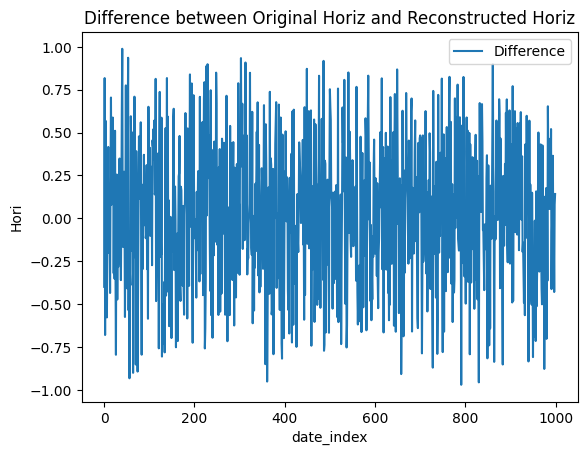

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Original Horiz data
horiz_acceleration = np.random.rand(1000, 1)

# Reconstructed Horiz data
reconstructed_data = np.random.rand(1000, 1)

# Calculate the difference
diff = horiz_acceleration - reconstructed_data

# Plot the difference
plt.plot(diff, label='Difference')
plt.xlabel('date_index')
plt.ylabel('Hori')
plt.title('Difference between Original Horiz and Reconstructed Horiz')
plt.legend()
plt.show()
